# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Three observable trends based on the data in this notebook:
##1. These data were collected in January which is winter in the Northern Hemisphere and Summer in the Southern 
##Hemisphere. As a result, The maximum temperatures are lower in the Northern Hemisphere than in the Southern 
##Hemisphere. The Latitude vs. Max Temp scatter plot reflects this difference.
##2. There is a slight positive correlation between both latitude and humidity and latitude and cloudiness in 
##both hemispheres so the higher the latitude, regardless of Hemisphere, the likelier it is to have higher humidity 
##and cloudiness percentage.
##3. There is a slight negative correlation between latitude and wind speed in the Southern Hemisphere but no 
##observable correlation in the Northern Hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#weather_api_key =  "asdf"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [4]:
test = requests.get(url+"&q="+"butaritari").json()

In [5]:
# set up lists to hold reponse info
name = []
number = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
dt = []

counter = 0
for city in cities:
    counter +=1
    if counter%59 == 0:
        time.sleep(60)
    # Perform a weather check on each city using a series of successive API calls.
    try:
        response = requests.get(url+"&q="+ city).json()
        name.append(response['name'])
        number.append(response['id'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        
        # Include a print log of each city as it's being processed (with the city number and city name).
        print(f"The city name is: {response['name']}")
        print(f"The city number is: {response['id']}")
    except KeyError:
        print("An exception occurred")
        
   

The city name is: Saint-Philippe
The city number is: 935215
The city name is: Punta Arenas
The city number is: 3874787
The city name is: Lashio
The city number is: 1314759
An exception occurred
The city name is: George Town
The city number is: 1735106
The city name is: Genhe
The city number is: 2037252
The city name is: Rikitea
The city number is: 4030556
The city name is: Nabire
The city number is: 1634614
The city name is: Tak Bai
The city number is: 1605957
The city name is: Ushuaia
The city number is: 3833367
The city name is: Betioky
The city number is: 1066310
An exception occurred
The city name is: Cape Town
The city number is: 3369157
The city name is: Petropavlovsk-Kamchatskiy
The city number is: 2122104
The city name is: Castro
The city number is: 3466704
The city name is: Nikolskoye
The city number is: 546105
The city name is: Am Timan
The city number is: 245338
The city name is: General Roca
The city number is: 3855065
The city name is: Dikson
The city number is: 1507390
Th

The city name is: Atuona
The city number is: 4020109
The city name is: Noumea
The city number is: 2139521
The city name is: Nanticoke
The city number is: 5202855
The city name is: Lavrentiya
The city number is: 4031637
The city name is: Kafue
The city number is: 915883
The city name is: Edgewater
The city number is: 4154205
The city name is: Katsuura
The city number is: 2112309
The city name is: Boo
The city number is: 2721259
The city name is: Province of Mantua
The city number is: 3174050
The city name is: Bismarck
The city number is: 5688025
The city name is: Pandan
The city number is: 1695546
The city name is: Zhigansk
The city number is: 2012530
An exception occurred
The city name is: Frontera
The city number is: 3980180
The city name is: Vanimo
The city number is: 2084442
The city name is: Palmer
The city number is: 4946620
The city name is: Lata
The city number is: 2738381
An exception occurred
An exception occurred
The city name is: Yulara
The city number is: 6355222
The city n

The city name is: Christchurch
The city number is: 2192362
The city name is: Flinders
The city number is: 6255012
The city name is: Ranau
The city number is: 1733502
The city name is: Dwārka
The city number is: 1272140
The city name is: Zyryanka
The city number is: 2119283
The city name is: Fethiye
The city number is: 314967
The city name is: Tiksi
The city number is: 2015306
The city name is: Troitsko-Pechorsk
The city number is: 481548
The city name is: Finnsnes
The city number is: 3157549
The city name is: Ucluelet
The city number is: 6171633
The city name is: Pevek
The city number is: 2122090
The city name is: Saint Anthony
The city number is: 5044290
The city name is: Atikokan
The city number is: 5888001
The city name is: Bahía Honda
The city number is: 3567995
The city name is: Séguéla
The city number is: 2596934
The city name is: Necochea
The city number is: 3430443
The city name is: Healdsburg
The city number is: 5356012
The city name is: Carira
The city number is: 3466941
An e

The city name is: Matamoros
The city number is: 3996426
The city name is: Raahe
The city number is: 640276
The city name is: Loudi
The city number is: 1802238
The city name is: Khorixas
The city number is: 3356213
The city name is: Taltal
The city number is: 3870243
The city name is: Korla
The city number is: 1529376
The city name is: Suşehri
The city number is: 739209
An exception occurred
The city name is: Sal Rei
The city number is: 3374235
The city name is: Seoul
The city number is: 1835848
The city name is: Kamina
The city number is: 214614
The city name is: Baruun-Urt
The city number is: 2032614
The city name is: Chernyshevskiy
The city number is: 2025456
The city name is: Hikone
The city number is: 1862636
The city name is: Cururupu
The city number is: 3401148
The city name is: Grand Gaube
The city number is: 934479
The city name is: Chapais
The city number is: 5919850
The city name is: Evensk
The city number is: 2125693
The city name is: Agartala
The city number is: 1279290
The

In [6]:
        
print(name)
print(number)
print(lat)
print(lon)
print(temp_max)
print(humidity)
print(clouds)
print(wind)
print(country)
print(dt)
        
        

['Saint-Philippe', 'Punta Arenas', 'Lashio', 'George Town', 'Genhe', 'Rikitea', 'Nabire', 'Tak Bai', 'Ushuaia', 'Betioky', 'Cape Town', 'Petropavlovsk-Kamchatskiy', 'Castro', 'Nikolskoye', 'Am Timan', 'General Roca', 'Dikson', 'Valdivia', 'Hobyo', 'Mossamedes', 'Tasiilaq', 'Beringovskiy', 'Mataura', 'Bambous Virieux', 'Port Alfred', 'Price', 'Port-Gentil', 'Kingaroy', 'Vaini', 'Batticaloa', 'Chokurdakh', 'Shubarkuduk', 'Te Anau', 'Vardø', 'Esterhazy', 'Souillac', 'Tura', 'Kieta', 'Cherskiy', 'Riyadh', 'Upernavik', 'Waingapu', 'Qaanaaq', 'Los Llanos de Aridane', 'Hobart', 'Porto-Vecchio', 'Port Elizabeth', 'Jamestown', 'Dickinson', 'Sept-Îles', 'Kharan', 'Salalah', 'Husavik', 'Lompoc', 'Narrabri', 'Longyearbyen', 'Bandarbeyla', 'Constitución', 'Boffa', 'Puerto Ayora', 'Saskylakh', 'Porto-Novo', 'Kalianget', 'Leshukonskoye', 'Khatanga', 'Barrow', 'Porto Velho', 'Ponta do Sol', 'Aklavik', 'Nanortalik', 'Bluff', 'Busselton', 'Coahuayana Viejo', 'Hilo', 'Isangel', 'Rodeo', 'Lāharpur', 'Laas

In [8]:
weather_check = pd.DataFrame({"City": name,
                              "Lat": lat,
                              "Lng": lon,
                              "Max Temp": temp_max,
                             "Humidity": humidity,
                              "Cloudiness": clouds,
                             "Wind Speed": wind,
                             "Country": country,
                             "Date": dt})
weather_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,82.40,78,75,2.30,RE,1610594927
1,Punta Arenas,-53.1500,-70.9167,53.60,71,90,13.80,CL,1610594565
2,Lashio,22.9333,97.7500,63.46,66,14,0.45,MM,1610594651
3,George Town,5.4112,100.3354,82.40,69,20,8.05,MY,1610594676
4,Genhe,50.7833,121.5167,-14.58,82,68,2.77,CN,1610594928
...,...,...,...,...,...,...,...,...,...
548,Silver City,32.7701,-108.2803,42.80,19,1,9.22,US,1610595471
549,Rome,43.2128,-75.4557,32.00,69,90,8.05,US,1610595632
550,College,64.8569,-147.8028,-5.80,77,75,2.73,US,1610595660
551,Whitehorse,60.7161,-135.0538,23.00,63,20,12.66,CA,1610595661


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
#just for fun
way_too_cold = weather_check.loc[weather_check["Max Temp"] < -10]
way_too_cold.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Genhe,50.7833,121.5167,-14.58,82,68,2.77,CN,1610594928
16,Dikson,73.5069,80.5464,-29.18,83,0,7.54,RU,1610594929
21,Beringovskiy,63.0500,179.3167,-11.20,89,100,9.75,RU,1610594781
30,Chokurdakh,70.6333,147.9167,-26.19,86,100,6.51,RU,1610594931
38,Cherskiy,68.7500,161.3000,-23.35,85,100,4.34,RU,1610594785
60,Saskylakh,71.9167,114.0833,-45.96,75,64,9.26,RU,1610594780
63,Leshukonskoye,64.8989,45.7622,-16.20,86,74,3.40,RU,1610594995
64,Khatanga,71.9667,102.5000,-36.38,82,96,12.17,RU,1610594781
68,Aklavik,68.2191,-135.0107,-14.80,84,100,4.63,CA,1610594996
123,Tuktoyaktuk,69.4541,-133.0374,-11.20,77,75,2.10,CA,1610594779


In [47]:
weather_check.to_csv("weather_check.csv")

In [9]:
## Apparently we need to find the count, mean, std, min, quartiles and max value of the lat, lng, 
## max temp, humidity, cloudiness, wind speed and date.

Latitude = weather_check["Lat"].agg(["count", "mean", "std", "min", "max"])
Longitude = weather_check["Lng"].agg(["count", "mean", "std", "min", "max"])
Max_Temp = weather_check["Max Temp"].agg(["count", "mean", "std", "min", "max"])
Humidity = weather_check["Humidity"].agg(["count", "mean", "std", "min", "max"])
Cloudiness = weather_check["Cloudiness"].agg(["count", "mean", "std", "min", "max"])
Wind_Speed = weather_check["Wind Speed"].agg(["count", "mean", "std", "min", "max"])
Date = weather_check["Date"].agg(["count", "mean", "std", "min", "max"])

In [10]:
Longitude.shape

(5,)

In [11]:
weather_agg = pd.DataFrame({ "Lat": Latitude,
                              "Lng": Longitude,
                              "Max Temp": Max_Temp,
                             "Humidity": Humidity,
                              "Cloudiness": Cloudiness,
                             "Wind Speed": Wind_Speed,
                             "Date": Date})
weather_agg

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.232910,12.761066,48.384087,73.466546,50.157324,7.858246,1.610595e+09
std,33.407249,91.449972,32.356375,20.008677,41.008556,5.238380,2.459250e+02
min,-54.800000,-179.166700,-58.000000,13.000000,0.000000,0.130000,1.610594e+09
max,78.218600,179.316700,111.200000,100.000000,100.000000,31.320000,1.610596e+09


In [12]:
weather_check.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.232910,12.761066,48.384087,73.466546,50.157324,7.858246,1.610595e+09
std,33.407249,91.449972,32.356375,20.008677,41.008556,5.238380,2.459250e+02
min,-54.800000,-179.166700,-58.000000,13.000000,0.000000,0.130000,1.610594e+09
25%,-6.884400,-67.583300,30.200000,64.000000,1.000000,3.850000,1.610595e+09
50%,27.633300,17.366700,55.990000,78.000000,57.000000,6.910000,1.610595e+09
75%,49.683500,91.275000,73.600000,88.000000,90.000000,11.210000,1.610595e+09
max,78.218600,179.316700,111.200000,100.000000,100.000000,31.320000,1.610596e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.

too_humid = weather_check.loc[weather_check["Humidity"] > 100, :]
too_humid.index

Int64Index([], dtype='int64')

In [14]:
clean_city_data = weather_check.loc[~(weather_check["Humidity"] > 100), :]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,82.40,78,75,2.30,RE,1610594927
1,Punta Arenas,-53.1500,-70.9167,53.60,71,90,13.80,CL,1610594565
2,Lashio,22.9333,97.7500,63.46,66,14,0.45,MM,1610594651
3,George Town,5.4112,100.3354,82.40,69,20,8.05,MY,1610594676
4,Genhe,50.7833,121.5167,-14.58,82,68,2.77,CN,1610594928


In [15]:
weather_check.drop(index = too_humid.index)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,82.40,78,75,2.30,RE,1610594927
1,Punta Arenas,-53.1500,-70.9167,53.60,71,90,13.80,CL,1610594565
2,Lashio,22.9333,97.7500,63.46,66,14,0.45,MM,1610594651
3,George Town,5.4112,100.3354,82.40,69,20,8.05,MY,1610594676
4,Genhe,50.7833,121.5167,-14.58,82,68,2.77,CN,1610594928
...,...,...,...,...,...,...,...,...,...
548,Silver City,32.7701,-108.2803,42.80,19,1,9.22,US,1610595471
549,Rome,43.2128,-75.4557,32.00,69,90,8.05,US,1610595632
550,College,64.8569,-147.8028,-5.80,77,75,2.73,US,1610595660
551,Whitehorse,60.7161,-135.0538,23.00,63,20,12.66,CA,1610595661


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

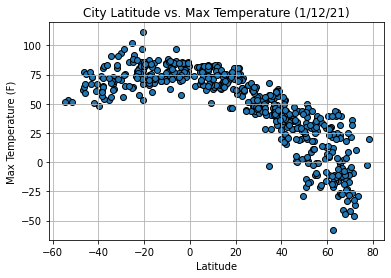

In [52]:
# Generate a scatter plot of City Latitude vs. Max Temperature 
x_axis = weather_check["Lat"]
y_axis = weather_check["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (1/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig('latvtemp.png')


In [ ]:
#In the above plot, the code is analyzing the relationship between a city's latitude and its maximum temperature.

## Latitude vs. Humidity Plot

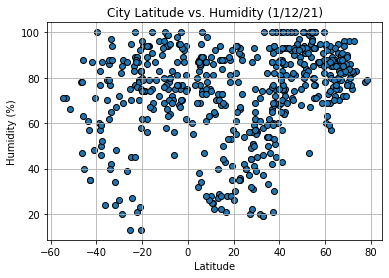

In [53]:
# Generate a scatter plot of City Latitude vs. Humidity 
x_axis = weather_check["Lat"]
y_axis = weather_check["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity (1/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.savefig('latvhum.png')

In [ ]:
#In the above plot, the code is analyzing the relationship between a city's latitude and its humidity percentage.

## Latitude vs. Cloudiness Plot

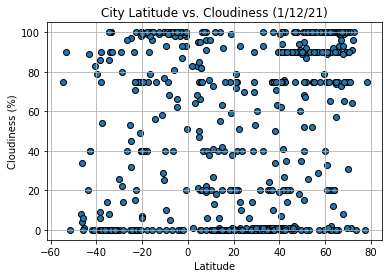

In [54]:
# Generate a scatter plot of City Latitude vs. Cloudiness 
x_axis = weather_check["Lat"]
y_axis = weather_check["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (1/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.savefig('latvcloud.png')

In [ ]:
#In the above plot, the code is analyzing the relationship between a city's latitude and its cloudiness percentage.

## Latitude vs. Wind Speed Plot

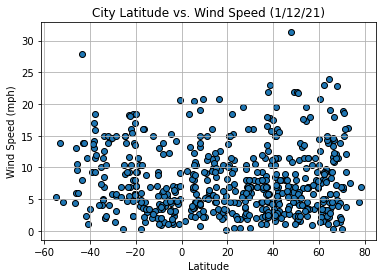

In [55]:
# Generate a scatter plot of City Latitude vs. Wind Speed 
x_axis = weather_check["Lat"]
y_axis = weather_check["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (1/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.savefig('latvwind.png')

In [ ]:
#In the above plot, the code is analyzing the relationship between a city's latitude and its wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7413866072244032


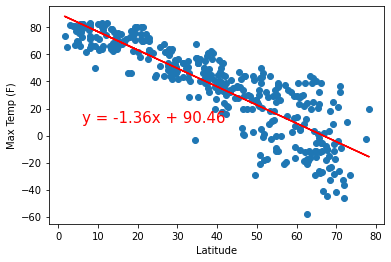

In [32]:
# Print out the r-squared value along with the plot.
#weather_check.loc[~(weather_check["Humidity"] > 100), :]
#x_axis = weather_check["Lat"]
x_axis = weather_check.loc[weather_check["Lat"] > 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] > 0]["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [28]:
print(x_axis)

                          City      Lat       Lng  Max Temp  Humidity  \
2                       Lashio  22.9333   97.7500     63.46        66   
3                  George Town   5.4112  100.3354     82.40        69   
4                        Genhe  50.7833  121.5167    -14.58        82   
7                      Tak Bai   6.2595  102.0546     82.40        74   
11   Petropavlovsk-Kamchatskiy  53.0452  158.6483      8.60        47   
..                         ...      ...       ...       ...       ...   
548                Silver City  32.7701 -108.2803     42.80        19   
549                       Rome  43.2128  -75.4557     32.00        69   
550                    College  64.8569 -147.8028     -5.80        77   
551                 Whitehorse  60.7161 -135.0538     23.00        63   
552                     Ouadda   8.0777   22.4007     64.85        28   

     Cloudiness  Wind Speed Country        Date  
2            14        0.45      MM  1610594651  
3            20        

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.18194632128211397


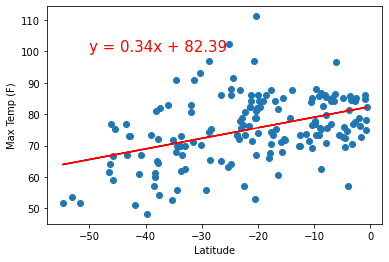

In [35]:
x_axis = weather_check.loc[weather_check["Lat"] < 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] < 0]["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16121947622560354


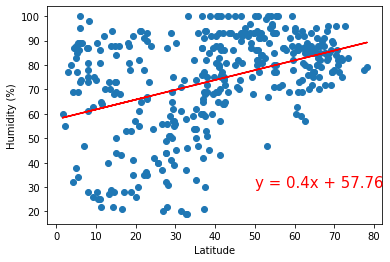

In [37]:
x_axis = weather_check.loc[weather_check["Lat"] > 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] > 0]["Humidity"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10478976516979888


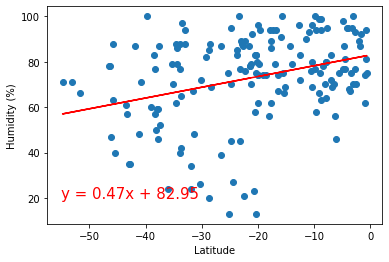

In [39]:
x_axis = weather_check.loc[weather_check["Lat"] < 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] < 0]["Humidity"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11802586179164617


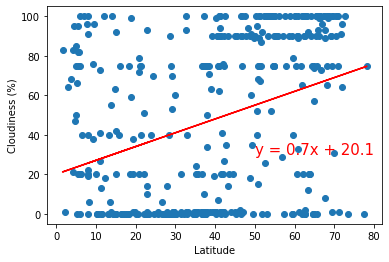

In [41]:
x_axis = weather_check.loc[weather_check["Lat"] > 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] > 0]["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16376585786112


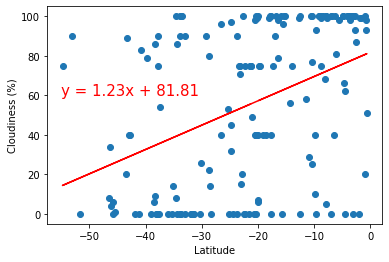

In [45]:
x_axis = weather_check.loc[weather_check["Lat"] < 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] < 0]["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0021124004889898993


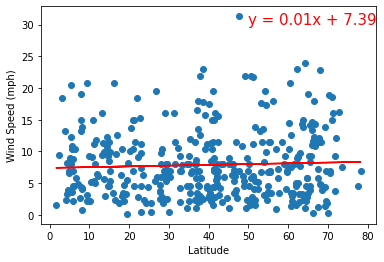

In [43]:
x_axis = weather_check.loc[weather_check["Lat"] > 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] > 0]["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0848493802656856


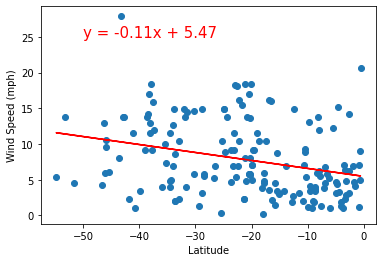

In [46]:
x_axis = weather_check.loc[weather_check["Lat"] < 0].Lat
y_axis = weather_check.loc[weather_check["Lat"] < 0]["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()